Loading in Movie Scripts

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/cpturtles/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load in the Film Scripts

In [ ]:
Thor = pd.read_excel("Thor Script.xlsx", index_col=0)
Thor.head()

,Script
1,Dark and cramped. The soft red light of fire s...
2,"A cavernous space. The walls, floors, and ceil..."
3,"Heimdall is nowhere to be found. Instead, we m..."
4,Having expected to have been Bi-Frosted out of...
5,Thor CRASHES out of the ground and LANDS on a ...


In [ ]:
Spiderman = pd.read_excel("Spider-Man Script.xlsx", index_col=0)
Spiderman.head()

,Script
1,"INT. PROFESSOR OCK""S PRIVATE PHYSICS LABORATOR..."
2,"As STUDENTS go to class, the sound of the cycl..."
3,It is a basement hallway full of LOCKERS which...
4,OCK The anti-force experiment has now reached ...
5,"This is an enormous room, 100 lab tables. The ..."


In [ ]:
Wonder_Woman= pd.read_excel("Wonder Woman.xlsx", index_col=0)
Wonder_Woman.head()

,Script
Scene,
1,"The EARTH as seen from space, perfect and seem..."
2,The LOUVRE MUSEUM -- with its 16th-Century arc...
3,Diana walks down a HALLWAY with Assyrian bas-r...
4,The CRATE is delivered to Diana -- a wall-moun...
5,THE PAST. Flashes of AMAZONS as they train for...


In [ ]:
Dark_Knight= pd.read_excel("DarkKnight.xlsx", index_col=0)
Dark_Knight.rename(columns={'script': 'Script'}, inplace=True)
Dark_Knight.head()

,Script
scene,
1,THE DARK KNIGHT \n\n\nby \n\nJonathan Nolan an...
2,CUT \n\nTO: \n\n\nDAYLIGHT. Moving over the to...
3,"INT. OFFICE, HIGH RISE — DAY \n\nA man in a CL..."
4,EXT. HIGH-RISE — DAY \n\n...into space. The me...
5,EXT. DOWNTOWN GOTHAM — DAY \n\nA MAN on the co...


In [ ]:
DKR= pd.read_excel("DKR_scenes.xlsx", index_col=0)
DKR.rename(columns={'script': 'Script'}, inplace=True)
for i in range(len(DKR['Script'])):
  DKR['Script'].loc[i+1] = str(DKR['Script'].loc[i+1])
DKR.head()

,Script
scene,
1,GORDON (V.O)\n Harvey Dent was neede...
2,"CIA MAN\n Dr. Pavel, I'm CIA.\n ..."
3,Hooded Man 1 says nothing. CIA Man pulls out a...
4,BANE\n Who we are does not matter. W...
5,"INT. MAIN CABIN, COMMUTER PLANE - CONTINUOUS\n..."


## Sentiment Analysis

Let's try a rule-based approach because our data is not labelled so we do not have training data for a model to assess accuracy

In [ ]:
# Rule based sentiment analysis with Vader
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cpturtles/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def sentiment_analysis(movie):
  sid = SentimentIntensityAnalyzer()
  # Create a column for each of the 4 scores given by the SentimentIntensityAnalyzer
  movie['Compound'] = 0
  movie['Negative'] = 0
  movie['Neutral'] = 0
  movie['Positive'] = 0

  for i in range(1,len(movie['Script'])+1):
    txt = movie['Script'].loc[i]
    ss = sid.polarity_scores(txt)
    # store the sentiment analyzer scores in their respective columns for each scene
    movie['Compound'].loc[i] = ss['compound']
    movie['Negative'].loc[i] = ss['neg']
    movie['Neutral'].loc[i] = ss['neu']
    movie['Positive'].loc[i] = ss['pos']

In [ ]:
# Run the function on each film
sentiment_analysis(Thor)
sentiment_analysis(Spiderman)
sentiment_analysis(Wonder_Woman)
sentiment_analysis(Dark_Knight)
sentiment_analysis(DKR)

/var/folders/gf/8m25x3gs4w7f6n2lzbsv3lx40000gn/T/ipykernel_72318/1641617480.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Compound'].loc[i] = ss['compound']
/var/folders/gf/8m25x3gs4w7f6n2lzbsv3lx40000gn/T/ipykernel_72318/1641617480.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Negative'].loc[i] = ss['neg']
/var/folders/gf/8m25x3gs4w7f6n2lzbsv3lx40000gn/T/ipykernel_72318/1641617480.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [ ]:
def pos_neg_neu(movie):
    movie['Sentiment'] = 0
    for i in range(len(movie['Compound'])):
        if movie['Compound'].loc[i+1] < -0.05:
            movie['Sentiment'].loc[i+1] = 'Negative'
        if -0.05 < movie['Compound'].loc[i+1] < 0.05:
            movie['Sentiment'].loc[i+1] = 'Neutral'
        if movie['Compound'].loc[i+1] > 0.05:
            movie['Sentiment'].loc[i+1] = 'Positive'

In [ ]:
pos_neg_neu(Thor)
pos_neg_neu(Spiderman)
pos_neg_neu(Wonder_Woman)
pos_neg_neu(Dark_Knight)
pos_neg_neu(DKR)

/var/folders/gf/8m25x3gs4w7f6n2lzbsv3lx40000gn/T/ipykernel_72318/2358290516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Sentiment'].loc[i+1] = 'Negative'
/var/folders/gf/8m25x3gs4w7f6n2lzbsv3lx40000gn/T/ipykernel_72318/2358290516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Sentiment'].loc[i+1] = 'Negative'
/var/folders/gf/8m25x3gs4w7f6n2lzbsv3lx40000gn/T/ipykernel_72318/2358290516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

### Let's look at the summary statistics of each movie's sentiments

In [ ]:
def count_sentiments(movie):
    # count the scenes with each sentiment
    pos = len(movie[movie['Sentiment'] == 'Positive'])
    neg = len(movie[movie['Sentiment'] == 'Negative'])
    neu = len(movie[movie['Sentiment'] == 'Neutral'])
    # standardize the counts so we can compare across movies with differing numbers of scenes
    pos_std = round(pos/len(movie['Sentiment']), 3)
    neg_std = round(neg/len(movie['Sentiment']), 3)
    neu_std = round(neu/len(movie['Sentiment']), 3)
    # print the results
    print(f'positive: {pos_std}, negative: {neg_std}, neutral: {neu_std}')

In [ ]:
count_sentiments(Thor)
count_sentiments(Spiderman)
count_sentiments(Wonder_Woman)
count_sentiments(Dark_Knight)
count_sentiments(DKR)

positive: 0.364, negative: 0.538, neutral: 0.098
positive: 0.376, negative: 0.413, neutral: 0.211
positive: 0.447, negative: 0.482, neutral: 0.07
positive: 0.393, negative: 0.424, neutral: 0.183
positive: 0.404, negative: 0.59, neutral: 0.006


### Let's visualize the compound sentiment analysis scores for each film

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


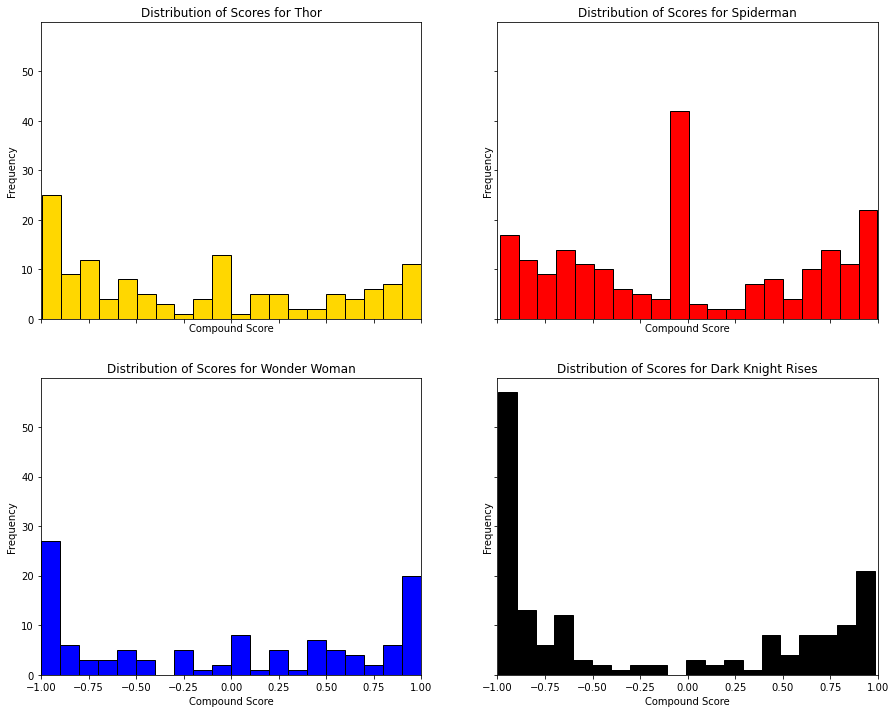

In [ ]:
import matplotlib.pyplot as plt

# make a corpus of movie scripts
movies = [Thor, Spiderman, Wonder_Woman, DKR]
# assign the film names to their respective dataframe in the corpus
movie_names = ['Thor', 'Spiderman', 'Wonder Woman', 'Dark Knight Rises']
# assign colors to each movie to make the visualizations easier
colors = ['gold', 'red', 'blue', 'black']

# plot the distributions of scores for each film
fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharey=True, sharex=True)

for i, (df, movie_name, color) in enumerate(zip(movies, movie_names, colors)):
    ax = axes[i // 2, i % 2]
    ax.hist(df['Compound'], bins=20, edgecolor='k', color=color)
    ax.set_xlabel('Compound Score')
    ax.set_xlim(-1.0,1.0)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of Scores for {movie_name}')
plt.show()

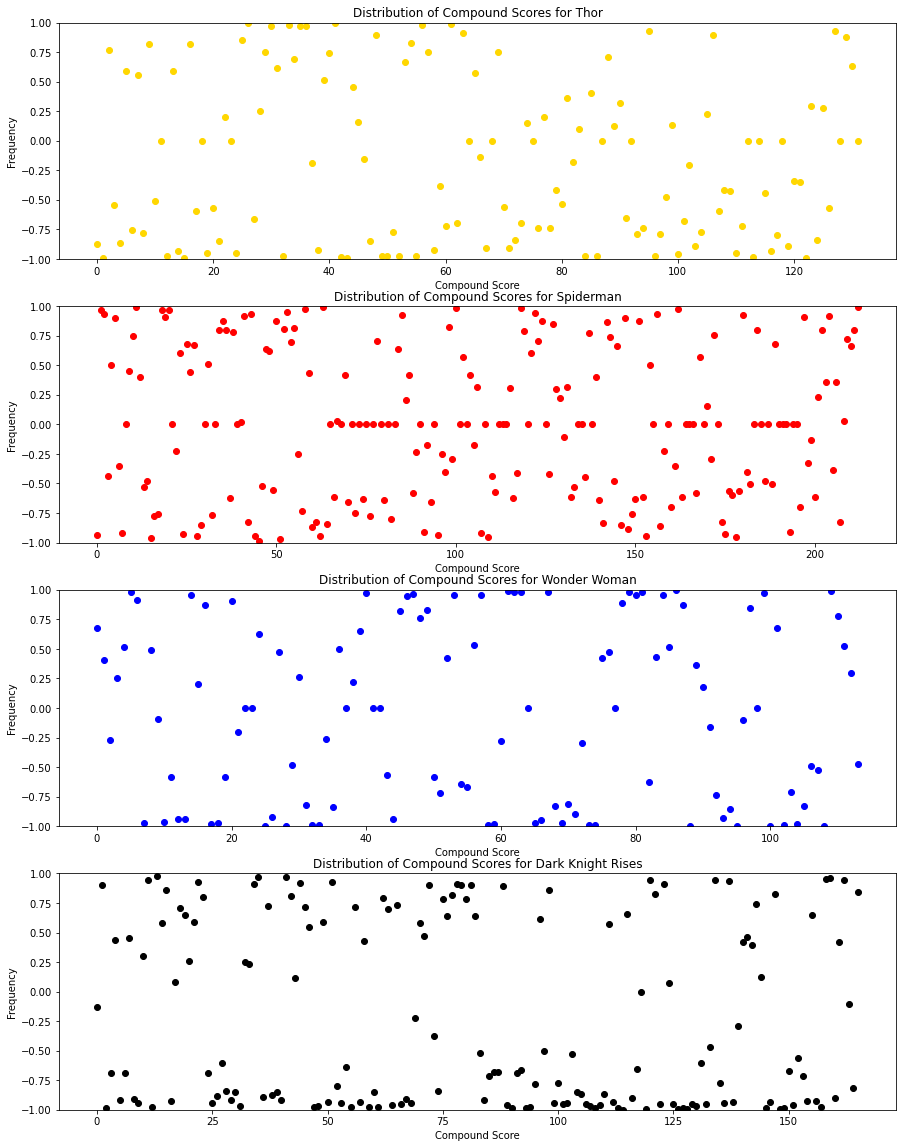

In [ ]:
# plot the distributions in order of scene for each film
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

for i, (df, movie_name, color) in enumerate(zip(movies, movie_names, colors)):
    ax = axes[i]
    ax.scatter(range(len(df['Compound'])), df['Compound'], color=color)
    ax.set_xlabel('Compound Score')
    ax.set_ylabel('Frequency')
    ax.set_ylim(-1.0,1.0)
    ax.set_title(f'Distribution of Compound Scores for {movie_name}')

plt.show()

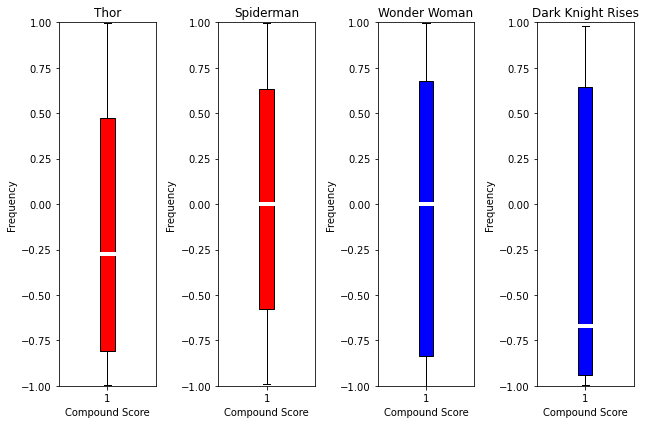

In [ ]:
# plot the distributions of scores as box-and-whisker plots for each film
fig, axes = plt.subplots(1, 4, figsize=(9, 6))

# assign colors to each studio to make the visualizations easier
colors = ['red', 'red', 'blue', 'blue']

for i, (df, movie_name, color) in enumerate(zip(movies, movie_names, colors)):
    ax = axes[i]
    ax.boxplot(df['Compound'],
               patch_artist=True,
               boxprops= {'facecolor': color},
               medianprops = {'linewidth': 4, 'color': 'white'})
    ax.set_xlabel('Compound Score')
    ax.set_ylabel('Frequency')
    ax.set_ylim(-1.0,1.0)
    ax.set_title(f'{movie_name}')

plt.tight_layout()

plt.show()

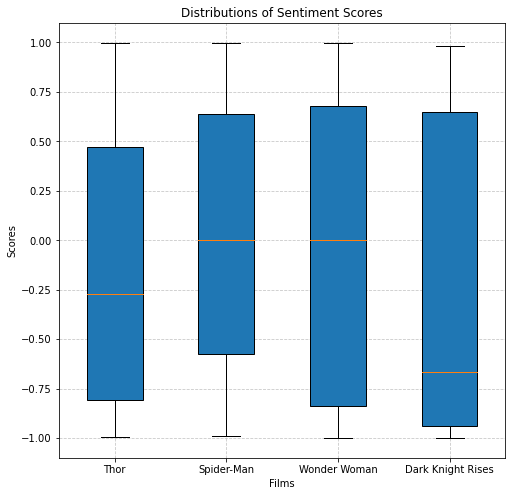

In [ ]:
# plot the 4 boxplots together in the same plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create the boxplots
boxplot1 = ax.boxplot(Thor['Compound'], positions=[1], widths=0.5, patch_artist=True)
boxplot2 = ax.boxplot(Spiderman['Compound'], positions=[2], widths=0.5, patch_artist=True)
boxplot3 = ax.boxplot(Wonder_Woman['Compound'], positions=[3], widths=0.5, patch_artist=True)
boxplot4 = ax.boxplot(DKR['Compound'], positions=[4], widths=0.5, patch_artist=True)

# Set labels for the x-axis
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Thor', 'Spider-Man', 'Wonder Woman', 'Dark Knight Rises'])

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Add a title and labels
ax.set_title('Distributions of Sentiment Scores')
ax.set_xlabel('Films')
ax.set_ylabel('Scores')

# Show the plot
plt.show()